# CHEM361 - Reference Jupyter Notebook for Homework 1

This notebook demonstrates 

- How to use `rdkit` to load molecules, calculate molecular properties, calculate morgan fingerprints.
- How to use clustering and dimensionality reduction methods available in `scikit-learn` (aka `sklearn`) on chemical compounds to discover underlying patterns.

## 1. Install Dependencies and Download Dataset

The packages and dataset required in this assignment are the same as in "homework0_reference.ipynb".

In [ ]:
!pip install pandas matplotlib rdkit scikit-learn wget

!python -m wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv \
    --output delaney-processed.csv

## 2. Molecular Representations

### 2.1 Load Molecule from SMILES

We will practice about how to load molecule from SMILES in RDKit. 

`rdkit` can convert any valid SMILES to a molecule automatically. Firstly, we import `rdkit.Chem` module that contains basic functions for woriking with small molecules, such as loading molecules and calculating molecular properties.

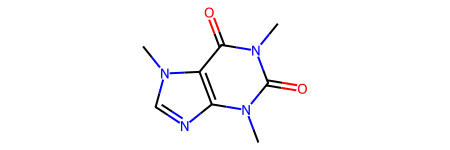

In [2]:
import rdkit.Chem as Chem

# caffeine
smi = "Cn1c(=O)c2c(ncn2C)n(C)c1=O"
mol = Chem.MolFromSmiles(smi)
mol

### 2.2 Canonical SMILES

Convert the molecule to canonical SMILES

In [3]:
Chem.MolToSmiles(mol, canonical=True)

'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

Similarly, you can try the other two SMILES examples for caffeine mentioned in the lecture.

Below is the SMILES string for Caffeine from PubChem

CN1C=NC2=C1C(=O)N(C(=O)N2C)C

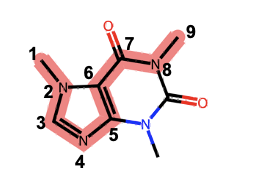

The canonical SMILES in RDKit for CN1C=NC2=C1C(=O)N(C(=O)N2C)C is Cn1c(=O)c2c(ncn2C)n(C)c1=O


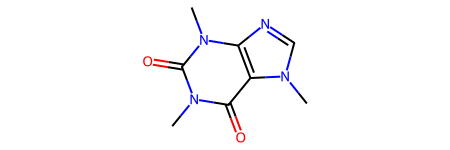

In [4]:
smi1 = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
mol1 = Chem.MolFromSmiles(smi1)
can_smi1 = Chem.MolToSmiles(mol1, canonical=True)
print(f"The canonical SMILES in RDKit for {smi1} is {can_smi1}")
mol1

Below is another SMILES string for Caffeine:

CN1C(=O)C2=C(N=CN2C)N(C)C1=O

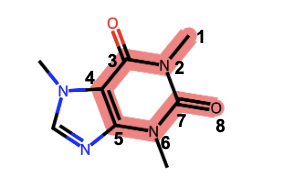

The canonical SMILES in RDKit for CN1C(=O)C2=C(N=CN2C)N(C)C1=O is Cn1c(=O)c2c(ncn2C)n(C)c1=O


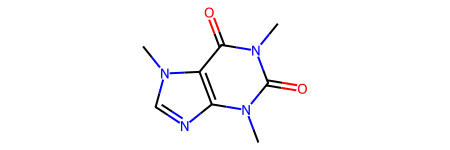

In [5]:
smi2 = "CN1C(=O)C2=C(N=CN2C)N(C)C1=O"
mol2 = Chem.MolFromSmiles(smi2)
can_smi2 = Chem.MolToSmiles(mol2, canonical=True)
print(f"The canonical SMILES in RDKit for {smi2} is {can_smi2}")
mol2

The above results show that three SMILES strings for caffeine discussed in the lecture. However, according to the canonical SMILES string scheme in RDkit, the following one:`"Cn1c(=O)c2c(ncn2C)n(C)c1=O"` is canonical.

**However**, if you look up the caffeine [CID2519](https://pubchem.ncbi.nlm.nih.gov/compound/2519) in the PubChem database, you'll notice that PubChem uses a different canonical SMILES string `"CN1C=NC2=C1C(=O)N(C(=O)N2C)C"`. This difference arises because there are multiple canonicalization algorithms.

**Note**: Don't worry too much about canonical SMILES if your primal goal is to use SMILES for loading molecules. However, if you need a one-to-one mapping between a molecule and its SMILES, make sure to stick to one specific canonicalization algorithm.

### 2.3. Morgan Fingerprints and Bit Collisions

`RDKit.Chem.AllChem` contains more advanced functions, such as calculating fingerprints and generating molecular conformation. To calculate Morgan fingerprint, we need to pass in a radius parameter `radius` and a length parameter `nBits`.

Don't worry if you see a deprecation warning when using `AllChem.GetMorganFingerprintAsBitVect` function, this function still works.

In [6]:
import rdkit.Chem.AllChem as AllChem

fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)

[16:02:35] DEPRECATION WARNING: please use MorganGenerator


In [7]:
print("Positions of 1-bit:")
for idx in fp.GetOnBits():
    print(idx, end=", ")

Positions of 1-bit:
0, 33, 121, 179, 234, 283, 314, 330, 356, 378, 385, 400, 416, 428, 463, 493, 504, 564, 650, 672, 771, 849, 932, 935, 

We can draw the subgraphs for the "1" bits. Firstly, we need to import the module `rdkit.Chem.Draw` for RDKit plotting. Secondly, we need to pass a dictionary `bi` to the fingerprint calculation, for storing the subgraphs.

[16:02:35] DEPRECATION WARNING: please use MorganGenerator


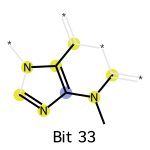

In [8]:
import rdkit.Chem.Draw as Draw

bi = {} # bit info
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bi)

idx = 33
on_bits = [(mol, idx, bi)]
labels = [f"Bit {str(idx)}"]
Draw.DrawMorganBits(on_bits, molsPerRow=1, legends=labels)

### 2.4. Molecular Properties

The rdkit.Chem.Descriptors module contains a wide variety of molecular descriptors that can be directly accessed to compute additional properties for molecules. For example, we can calculate some basic molecular descriptors:

In [9]:
import numpy as np
import rdkit.Chem.Descriptors as Descriptors
property_array = np.array([
    Descriptors.MolWt(mol),
    Chem.Lipinski.NumHAcceptors(mol),
    Chem.Lipinski.NumHDonors(mol), 
    Chem.Lipinski.RingCount(mol)
])
print("Custom molecular descriptor array:", property_array)

Custom molecular descriptor array: [194.194   6.      0.      2.   ]


The concept of "drug-likeness" often involves applying specific rules or scoring functions, such as Lipinski's Rule of Five or the QED (Quantitative Estimation of Drug-likeness) as described in the paper "[Quantifying the chemical beauty of drugs](https://doi.org/10.1038/nchem.1243)" (Nature Chemistry, 2012).

RDKit implements QED directly, making it easy to compute drug-likeness scores for molecules.

In [10]:
# quantitative estimation of drug-likeness (QED)
q = Descriptors.qed(mol)
print("QED of caffeine:", q)

QED of caffeine: 0.5384628262372215


More scripts and workflows developed by the community are available at the [rdkit.Contrib](https://github.com/rdkit/rdkit/tree/master/Contrib). The is not a module that can be imported directly. If you want to calculate the synthetic accessibility score (SAScore) of molecules in organic synthesis, you can use the following blocks to: 

1. download scripts from the repository
2. add the script to the system path
3. import thhe script and do calculation

In [11]:
## Download source code to compute synthetic availability score from rdkit
!python -m wget https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/SA_Score/sascorer.py
!python -m wget https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/SA_Score/fpscores.pkl.gz


Saved under sascorer.py

Saved under fpscores.pkl.gz


In [12]:
import os, sys
from rdkit.Chem import RDConfig
# using literature contributors
# from https://github.com/rdkit/rdkit/tree/master/Contrib
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))

import sascorer
s = sascorer.calculateScore(mol)
print("Synthetic Availability:", s)

Synthetic Availability: 2.29798245679401


## 3. Work on a Dataset

You are an expert in SMILES, molecular properties, and fingerprints. In this section, we will explore how to apply the functions mentioned in the above section to multiple molecules.

### 3.1 Load Dataset

In [13]:
import pandas as pd

DELANEY_FILE = "delaney-processed.csv"
df = pd.read_csv(DELANEY_FILE)
print(f"Number of molecules in the dataset: {df.shape[0]}")

Number of molecules in the dataset: 1128


In [14]:
df.head(5)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


### 3.2. Pandas DataFrame Operations
Recap in Homework 0, we created a molecule from each SMILES and stored the created molecules in a new column "mol" using the following command:
```python
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df, "smiles", "mol")
```

Equivalent, we can use `Chem.MolFromSmiles` to create molecules:

```python
# fetch the smiles column in df
smis = df["smiles"]

# apply Chem.MolFromSmiles for each SMILES string
# mols is a column of molecules
mols = smis.apply(lambda x: Chem.MolFromSmiles(x))

# add mols to df
df["mol"] = mols
```

In [15]:
# get molecules from smiles
df["mol"] = df["smiles"].apply(lambda x: Chem.MolFromSmiles(x))

Morgan fingerpring of each molecule in the dataset can be calculated using `df.apply` together with the `lambda` function. Just in case the deprecated warning of `AllChem.GetMorganFingerprintAsBitVect` occur repeatedly, we can use a new function when calculating the fingerprints of multiple molecules. 

In [16]:
# rdFingerprintGenerator is recommended in the newer versions of rdkit to replace AllChem.GetMorganFingerprintAsBitVect
from rdkit.Chem import rdFingerprintGenerator

morgan_fp_gen = rdFingerprintGenerator.GetMorganGenerator(includeChirality=True, radius=2, fpSize=1024)

# morgan_fp_gen.GetFingerprint(mol) converts a mol to a fingerprint
# we use apply to convert all mols to fingerprints
df["fp"] = df["mol"].apply(lambda x: morgan_fp_gen.GetFingerprint(x))

Now let's check the dataframe. There should be two additional columns: "mol" and "fp".

In [17]:
df.head(3)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol,fp
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x00000228672...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x00000228672...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x00000228672...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## 4. Clustering

We want to clustering using "Molecular Weight", "Number of H-Bond Donors", "Number of Rings" and "Number of Rotatable Bonds". We can select these columns from the dataframe.

In [18]:
# select multi-columns
X = df[["Molecular Weight", "Number of H-Bond Donors", "Number of Rings", "Number of Rotatable Bonds"]]

# keep values only, discard the df.index
X = X.values

# print the shape
print("Shape of X:", X.shape)

Shape of X: (1128, 4)


You can print the values in X to check.

In [19]:
print(X)

[[457.432   7.      3.      7.   ]
 [201.225   1.      2.      2.   ]
 [152.237   0.      0.      4.   ]
 ...
 [246.359   0.      0.      7.   ]
 [ 72.151   0.      0.      1.   ]
 [365.964   0.      1.      5.   ]]


The matrix shape means that it has 1128 rows (the number of molecules), and 4 columns (the number of features we chose).

### 4.1 Data Normalization

As we highlighted in the lecture, data normalization is important, especially for techniques like clustering and PCA. One common way to normalize data is by using `StandardScalar` from the `sklearn.preprocessing` module. The formula for normalization is:
$$Z = \frac{X-\mu}{\sigma}$$

This scaling method substracts the mean $\mu$ from the original data and divides by the standard deviation ($\sigma$), ensuring that each feature has a mean of 0 and a standard deviation of 1.

In [20]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# transform X to Z, Z has a mean of 0 and std of 1
Z = scaler.fit_transform(X)

In [21]:
Z

array([[ 2.46848464,  5.78268892,  1.22109812,  1.82691435],
       [-0.02640966,  0.27428095,  0.46220077, -0.06716597],
       [-0.50344534, -0.64378704, -1.05559391,  0.69046616],
       ...,
       [ 0.41309652, -0.64378704, -1.05559391,  1.82691435],
       [-1.28330735, -0.64378704, -1.05559391, -0.44598203],
       [ 1.57778691, -0.64378704, -0.29669657,  1.06928222]],
      shape=(1128, 4))

You can calculate the mean and std of each feature using the following commands to check that `StandardScalar` did a good job in normalizing the data.
```python
print("Check the mean of each feature:", Z.mean(axis=0))
print("Check the std of each feature:", Z.sdt(axis=0))
```

### 4.2 K-means Clustering

We don't have reinvent the wheel every time we use a well-established method. After understanding the fundamentals of KMeans algorithm, we can confidently use `KMeans` from `sklearn`. There are two major decisions to make when using KMeans:

1. the number of clusters (`n_clusters`)
2. the initial centers
   
By default, `sklearn.cluster.KMeans` use the "k-means++" method to find initial centers. This method aims to find initial centers that are spread out, which helps improve the performance and convergence of the algorithm.

In [22]:
from sklearn.cluster import KMeans

# please explore n_clusters
n_clusters = 3

k_means = KMeans(n_clusters, init="k-means++")

# fit data
k_means.fit(Z)

# fetch predicted labels for each datapoint
labels = k_means.labels_

c:\Users\24153\anaconda3\envs\chem361\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


We can find the number of molecules in each cluster (cluster size).

In [23]:
# you can use for-loop to find out the size, but here's a quicker way
from collections import Counter
Counter(labels)

Counter({np.int32(0): 647, np.int32(2): 324, np.int32(1): 157})

Let's fetch the value of loss function (sum of squared distance)

In [24]:
ssd = k_means.inertia_
print(f"Sum of squared distance after model fitting: {ssd:.2f}")

Sum of squared distance after model fitting: 2516.39


You can apply the expirical "elbo" method to pick a better `n_clusters` from this plot.

### 4.3 DBSCAN Clustering

There are two major decisions to make when using DBSCAN:

1. the distance `eps` used to build $\epsilon$-neighbourhood
2. the minimum number of neighbours `min_samples` to determine core points

It is important to note that 

In [25]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples, \
    metric="euclidean", algorithm="auto")

dbscan.fit(Z)

DBSCAN()

You can find out the number of clusters after DBSCAN clustering, but pay attention to points with cluster label as -1. These points are **noise**, not clustered. 

In [26]:
counter = Counter(dbscan.labels_)
# remove cluster_id=-1
counter.pop(-1)

print("Number of clusters:", len(counter))
print("Size of each cluster:", counter)

Number of clusters: 18
Size of each cluster: Counter({np.int64(1): 223, np.int64(3): 150, np.int64(5): 118, np.int64(4): 107, np.int64(10): 62, np.int64(7): 60, np.int64(0): 53, np.int64(11): 42, np.int64(6): 35, np.int64(8): 30, np.int64(9): 28, np.int64(12): 24, np.int64(15): 16, np.int64(13): 10, np.int64(2): 9, np.int64(16): 7, np.int64(14): 5, np.int64(17): 5})


## 5. Dimensionality Reduction using PCA

### 5.1 PCA on Molecular Descriptors

PCA should also use data after remove mean. Therefore, we still use $Z$ matrix.

In [27]:
from sklearn.decomposition import PCA
n_components = 1
pca = PCA(n_components=n_components)
pca.fit(Z)

Z_reduced = pca.transform(Z)
print("Shape of the reduced matrix:", Z_reduced.shape)

Shape of the reduced matrix: (1128, 1)


The we fetch the vectors of pricipal components (the eigenvectors we mentioned in lecture).

In [28]:
# principal components
pca.components_

array([[0.67953142, 0.37265949, 0.5759563 , 0.2600698 ]])

I need to emphasize on the shape of input `Z`, the output `Z_reduced` and the PCs `pca.components_`. `Z` has the shape of (1128, 4), `Z_reduced` has the shape of (1128, 1), and `pca.components_` has the shape of $(1, 4)$. The input and output of `sklearn.decomposition.PCA` are on the row space, while in equations in lecture are on the column space. Both are correct.